# -cctv  EDA-

### 필요한 라이브러리 및 데이터 호출

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import scipy as sp
from collections import Counter

# Graphs
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

In [3]:
cctv = pd.read_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/CCTV분석최종데이터/final_cctv7.csv',encoding='cp949')
crime = pd.read_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/읍면동별 범죄등급/emd_crime.csv',encoding='cp949')

### 데이터 결측값 처리

In [4]:
#결측값 -> 0 처리
cctv['총인구'] = cctv['총인구'].fillna(0)
cctv['범죄등급합'] = cctv['범죄등급합'].fillna(0)
cctv['단독주택면적'] = cctv['단독주택면적'].fillna(0)
cctv['범죄취약계층'] = cctv['범죄취약계층'].fillna(0)

cctv['초등학생_여자'] = cctv['초등학생_여자'].fillna(0)
cctv['중학생_여자'] = cctv['중학생_여자'].fillna(0)
cctv['고등학생_여자'] = cctv['고등학생_여자'].fillna(0)
cctv['20대여성'] = cctv['20대여성'].fillna(0)
cctv['30대여성'] = cctv['30대여성'].fillna(0)
cctv['총여자인구'] = cctv['총여자인구'].fillna(0)
cctv['심야유동인구24_06'] = cctv['심야유동인구24_06'].fillna(0)
cctv['야간유동인구18_24'] = cctv['야간유동인구18_24'].fillna(0)

cctv['감시취약지수'] = cctv['감시취약지수'].fillna(0)
cctv['범죄취약지수'] = cctv['범죄취약지수'].fillna(0)
cctv['최종설치지수'] = cctv['최종설치지수'].fillna(0)
cctv['LI_KOR_NM'] = cctv['LI_KOR_NM'].fillna(0)

#LI_KOR_NM -> 법정리
cctv.rename(columns = {'LI_KOR_NM':'법정리'}, inplace=True)

### 데이터 정제 및 파생변수 생성

In [5]:
#cctv설치유무 1,0으로 생성
cctv_list = []
for i in range(0,len(cctv)):
    if cctv['CCTV갯수'][i]>=1:
        cctv_list.append(1)
    else:
        cctv_list.append(0)

In [6]:
cctv['CCTV설치유무']=cctv_list

In [7]:
#읍면동으로 그룹화
cctv_emd = cctv.groupby(['읍면동']).sum().reset_index()

#법정리로 그룹화
cctv_li = cctv.groupby(['법정리']).sum().reset_index()
cctv_li = cctv_li.iloc[1:,:]

In [8]:
#총인구대비 CCTV갯수
cctv_emd['cctv_den'] = cctv_emd['CCTV갯수']/cctv_emd['총인구']
cctv_li['cctv_den'] = cctv_li['CCTV갯수']/cctv_li['총인구']

In [11]:
cctv_emd.to_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/CCTV분석최종데이터/cctv_emd.csv',encoding='cp949')
cctv_li.to_csv('C:/Users/User/Desktop/청년인턴/분석과제/CCTV/동혁_화성시CCTV/9.9결과/CCTV분석최종데이터/cctv_li.csv',encoding='cp949')

### 상관관계

In [38]:
cctv_emd.corr()

,총인구,범죄등급합,cctv설치유무,유흥갯수,숙박갯수,금융갯수,단독주택면적,범죄취약계층,20대여성,30대여성,...,총여자인구,심야유동인구24_06,야간유동인구18_24,격자가중치,감시취약지수,범죄취약지수,CCTV갯수,조회CCTV갯수,최종설치지수,CCTV설치유무
총인구,1.000000,0.787295,0.492707,0.743190,0.161118,0.706357,0.079700,0.947865,0.977329,0.955416,...,0.997906,0.736160,0.788409,0.032231,0.309822,0.413163,0.626190,0.783046,0.370836,0.492707
범죄등급합,0.787295,1.000000,0.767343,0.922253,0.490594,0.843565,0.444569,0.703825,0.757908,0.643267,...,0.759550,0.825332,0.860415,0.368504,0.577808,0.652224,0.763467,0.999405,0.628238,0.767343
cctv설치유무,0.492707,0.767343,1.000000,0.626887,0.407529,0.503741,0.806221,0.302295,0.374487,0.330341,...,0.441642,0.705989,0.661615,0.792830,0.881370,0.870473,0.918530,0.782788,0.892983,1.000000
유흥갯수,0.743190,0.922253,0.626887,1.000000,0.352497,0.907750,0.295276,0.683145,0.741630,0.619441,...,0.719829,0.734215,0.789645,0.212478,0.424513,0.523257,0.664049,0.915192,0.483660,0.626887
숙박갯수,0.161118,0.490594,0.407529,0.352497,1.000000,0.339943,0.466151,0.159370,0.149153,0.057028,...,0.138876,0.330477,0.298746,0.382066,0.437079,0.348021,0.247169,0.484906,0.405190,0.407529
금융갯수,0.706357,0.843565,0.503741,0.907750,0.339943,1.000000,0.220206,0.708078,0.722032,0.602226,...,0.691259,0.729495,0.793170,0.148964,0.362741,0.464981,0.522126,0.836055,0.422776,0.503741
단독주택면적,0.079700,0.444569,0.806221,0.295276,0.466151,0.220206,1.000000,-0.062252,-0.040412,-0.120966,...,0.025063,0.529567,0.415983,0.953952,0.944234,0.831260,0.588528,0.462703,0.906536,0.806221
범죄취약계층,0.947865,0.703825,0.302295,0.683145,0.159370,0.708078,-0.062252,1.000000,0.960838,0.903270,...,0.959310,0.674370,0.735045,-0.122161,0.143226,0.253362,0.408315,0.692719,0.205677,0.302295
20대여성,0.977329,0.757908,0.374487,0.741630,0.149153,0.722032,-0.040412,0.960838,1.000000,0.935322,...,0.981972,0.687704,0.759384,-0.090040,0.185494,0.298625,0.501848,0.749320,0.249598,0.374487
30대여성,0.955416,0.643267,0.330341,0.619441,0.057028,0.602226,-0.120966,0.903270,0.935322,1.000000,...,0.963584,0.577036,0.639391,-0.156889,0.115524,0.223401,0.534215,0.637358,0.175067,0.330341


<Figure size 1080x1080 with 0 Axes>

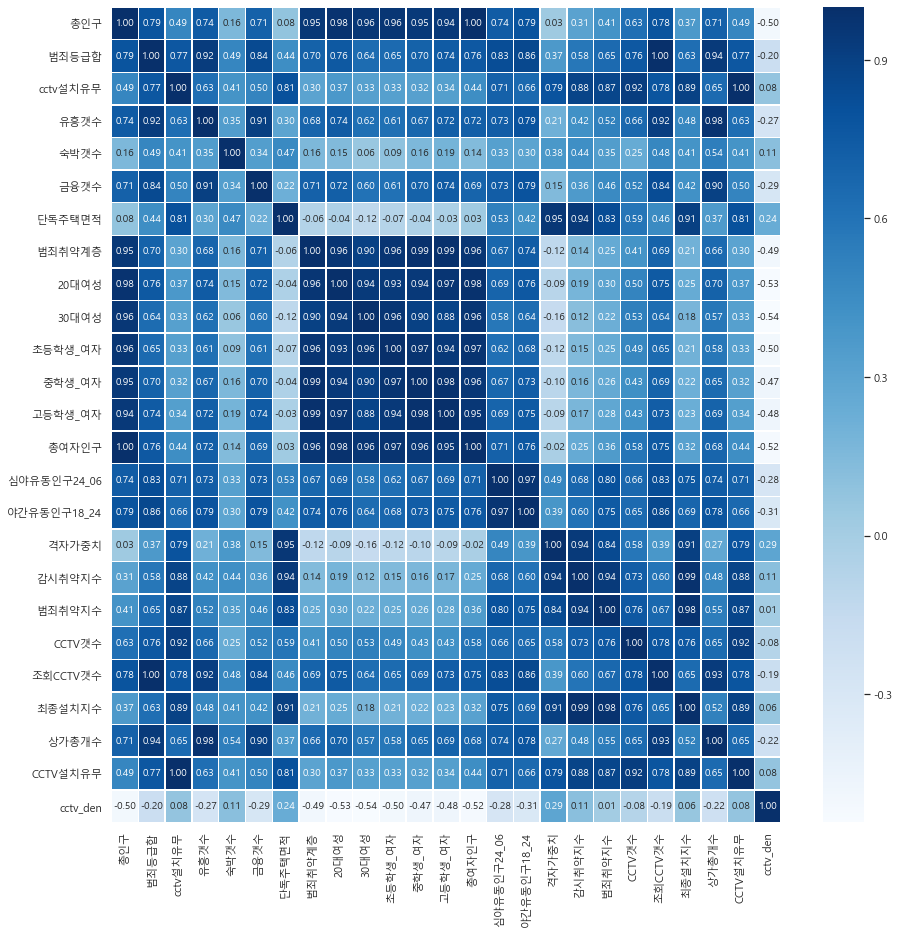

In [186]:
plt.figure(figsize=(15,15))
sns.heatmap(data = cctv_emd.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<Figure size 1080x1080 with 0 Axes>

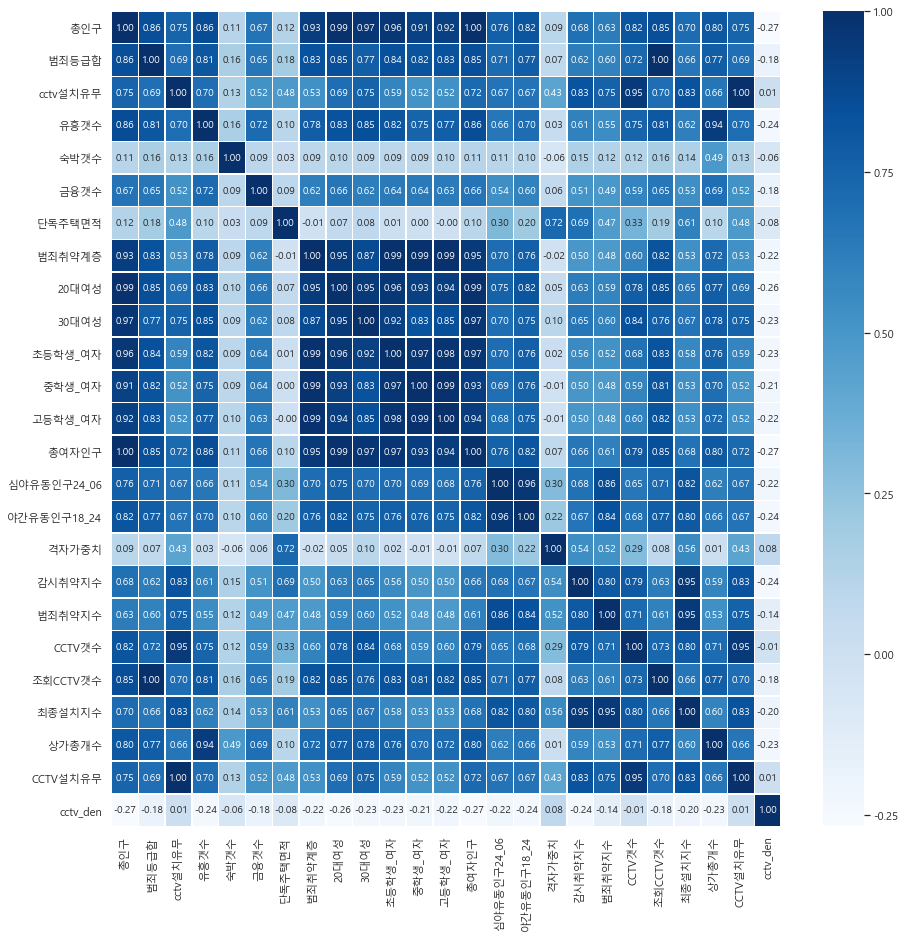

In [187]:
plt.figure(figsize=(15,15))
sns.heatmap(data = cctv_li.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 데이터 시각화

### 1.읍면동별 cctv 갯수

- 향남읍,남양읍,영천동,봉담읍 순서대로 설치가 많이 되어있다.

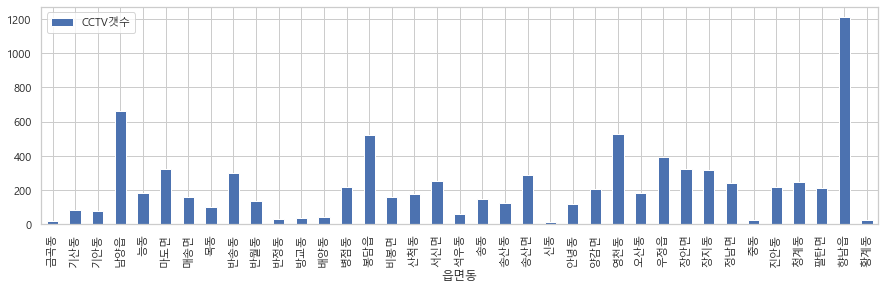

In [87]:
plt.rcParams["figure.figsize"] = (15,4)
cctv_emd.plot.bar(x='읍면동',y='CCTV갯수')

### 1-2. 총인구대비 읍면동별 cctv 갯수

- cctv갯수가 많은 향남읍,남양읍,영천동,봉담읍은 모두 거주인구대비 cctv갯수가 굉장히 적다

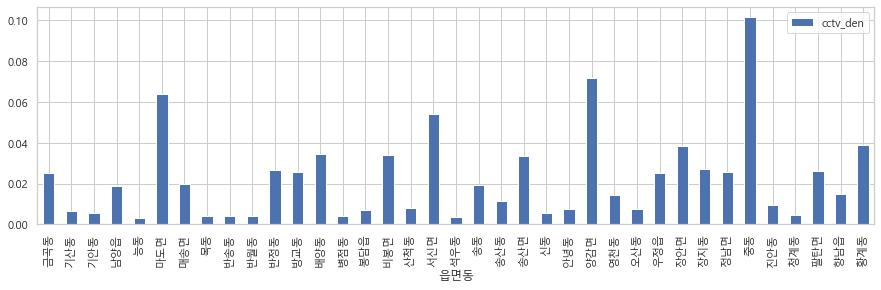

In [89]:
plt.rcParams["figure.figsize"] = (15,4)
cctv_emd.plot.bar(x='읍면동',y='cctv_den')

### 2.읍면동별 CCTV조회건수

- 향남읍,반송동,봉담읍 순서대로 경찰이 이 지역에 설치되어있는 cctv를 조회하였다. 범죄,사고관련 사고가 많음을 예상할 수 있다.

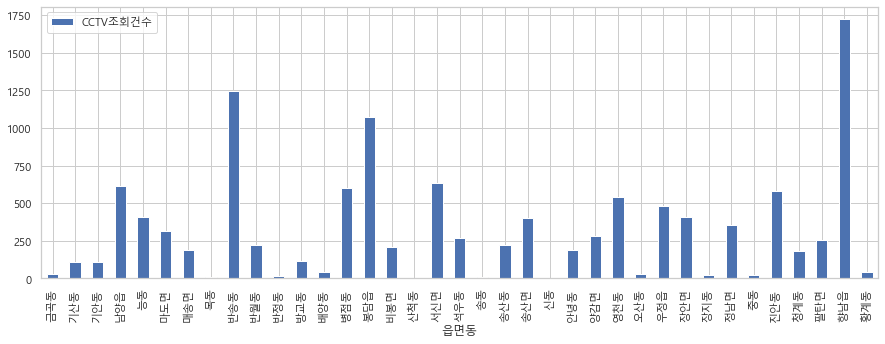

In [148]:
cctv2.plot.bar(x='읍면동',y='CCTV조회건수')

- 대체로 cctv갯수와 cctv조회건수는 양의상관관계(0.81)를 보이지만 반송동,봉답읍,향남읍,병점동 은 cctv갯수에 비해 조회건수가 매우 많다

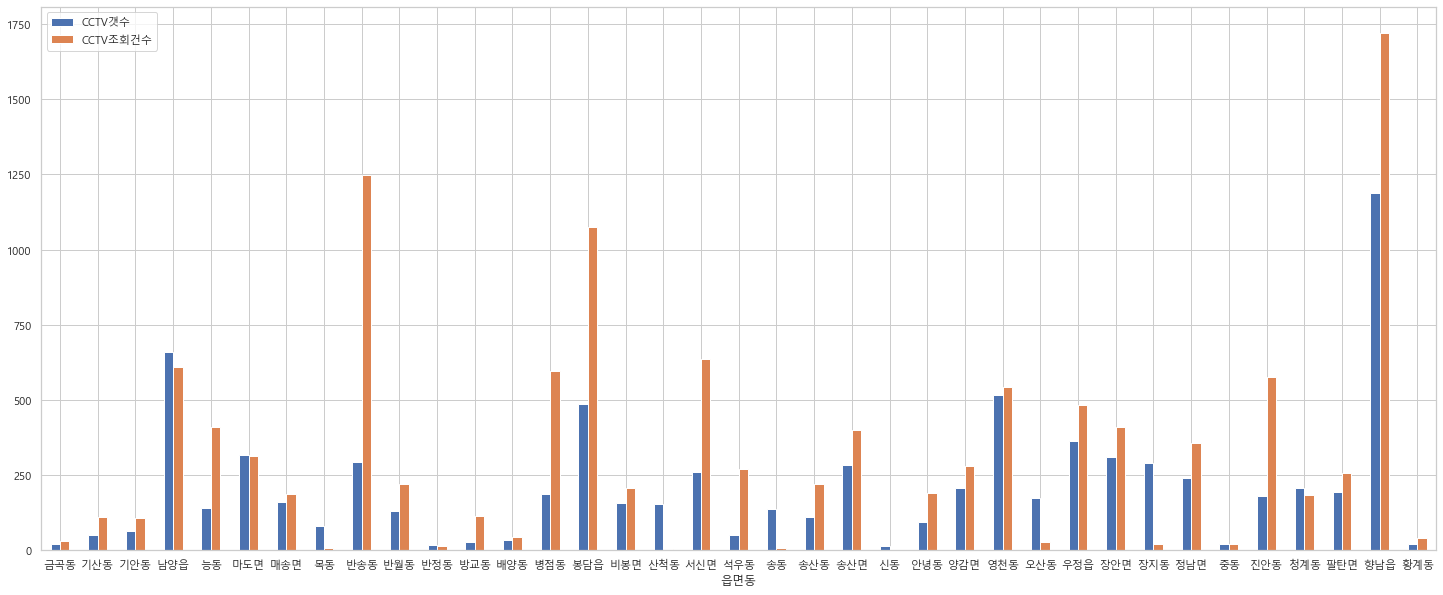

In [161]:
#cctv갯수와 cctv조회건수 한번에보기
plt.rcParams["figure.figsize"] = (25,10)
cctv_count = list(cctv2['CCTV갯수'])
cctv_show = list(cctv2['CCTV조회건수'])
index = cctv2['읍면동']
df = pd.DataFrame({'CCTV갯수': cctv_count,'CCTV조회건수': cctv_show}, index=index)
ax = df.plot.bar(rot=0)

### 3.읍면동별 범죄등급 분포

- cctv를 조회한 목적을 범죄등급별로 볼 수 있다. 범죄등급 '2' 인 것이 대부분이다.

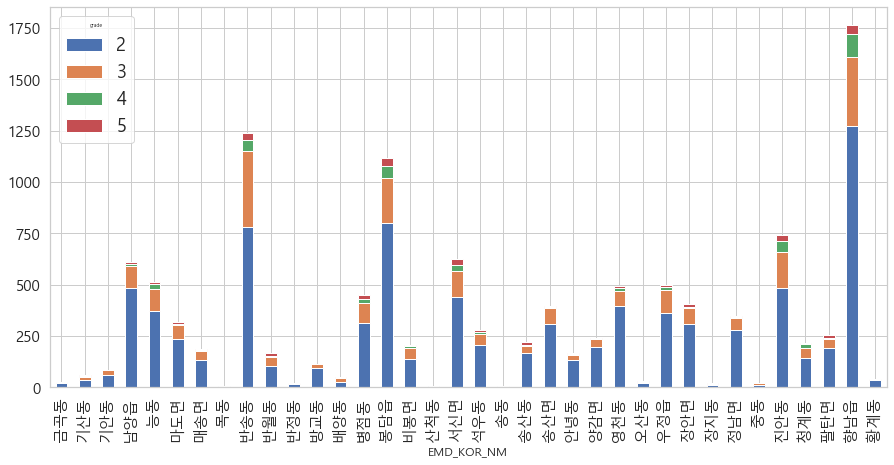

In [49]:
import pylab as plot
params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plot.rcParams.update(params)

plt.rcParams["figure.figsize"] = (15,7)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)


ct = pd.crosstab(crime['EMD_KOR_NM'],crime['grade']) 
ct.plot.bar(stacked=True) 
plt.show() 

### 4.읍면동별 상가 분포

- 상가의 대부분은 유흥업소이며 향납읍,반송동에 상가가 가장 많음을 알 수 있다.

In [159]:
cctv2['sangga'] = cctv2['유흥갯수']+cctv2['숙박갯수']+cctv2['금융갯수']

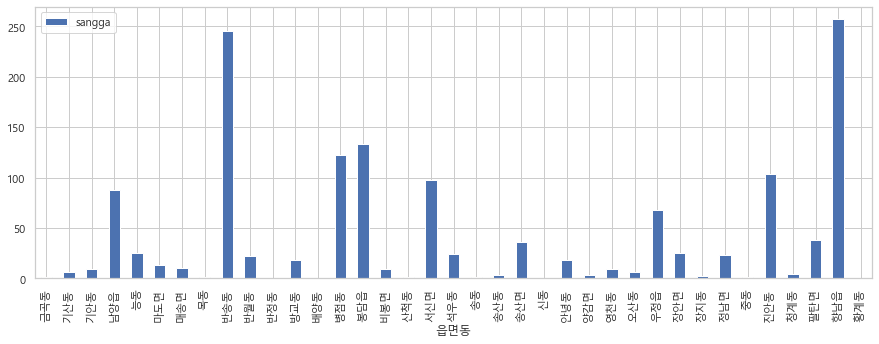

In [162]:
plt.rcParams["figure.figsize"] = (15,5)
cctv2.plot.bar(x='읍면동',y='sangga')

- 대체로 상가업소가 많은 지역은 발생한 범죄등급이 높다. 특히 봉담읍은 상가업소 갯수에비해 범죄등급이 꽤 높다는 것을 알 수 있다.

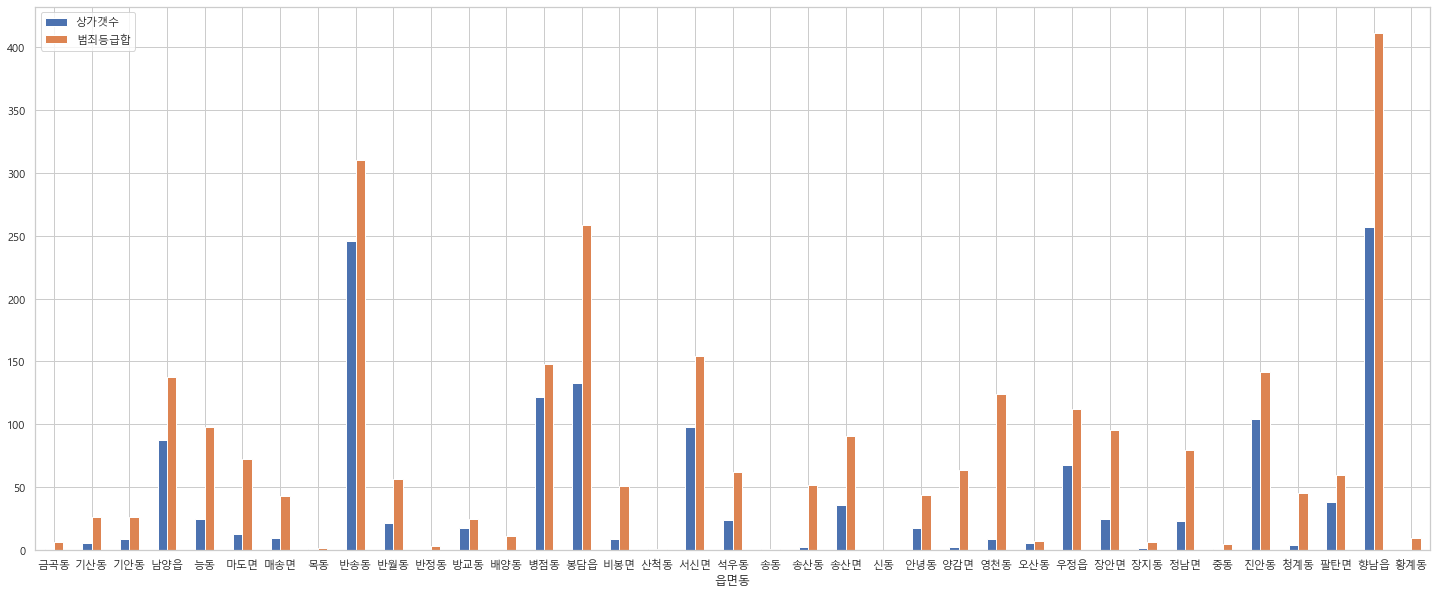

In [168]:
#상가갯수와 범죄등급합 한눈에 보기
plt.rcParams["figure.figsize"] = (25,10)
sangga = list(cctv2['sangga'])
crime_grade = list(cctv2['범죄등급합']/10) #상가갯수와 범죄등급의 scale을 맞추기 위함
index = cctv2['읍면동']
df = pd.DataFrame({'상가갯수': sangga,'범죄등급합': crime_grade}, index=index)
ax = df.plot.bar(rot=0)

### 5.범죄취약계층(여성10대~30대)유동 분포

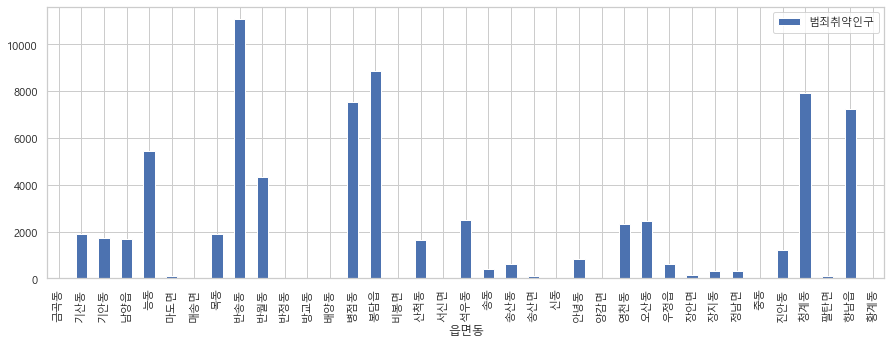

In [179]:
plt.rcParams["figure.figsize"] = (15,5)
cctv2.plot.bar(x='읍면동',y='범죄취약인구')

In [178]:
cctv2.columns

Index(['읍면동', '총인구', 'CCTV갯수', 'CCTV조회건수', '범죄등급합', 'cctv설치유무', '유흥갯수', '숙박갯수',
       '금융갯수', '단독주택면적', '범죄취약인구', 'age20_29', 'age30_39', 'age8_13',
       'age14_16', 'age17_19', 'age_total', 'time_24_06', 'time_18_24',
       '격자가중치', '감시취약지수', '범죄취약지수', '최종설치지수', 'CCTV설치유무', 'sangga'],
      dtype='object')

- 범죄취약계층유동과 범죄등급은 어느정도 관계가 있다(0.67)고 할 수 있다

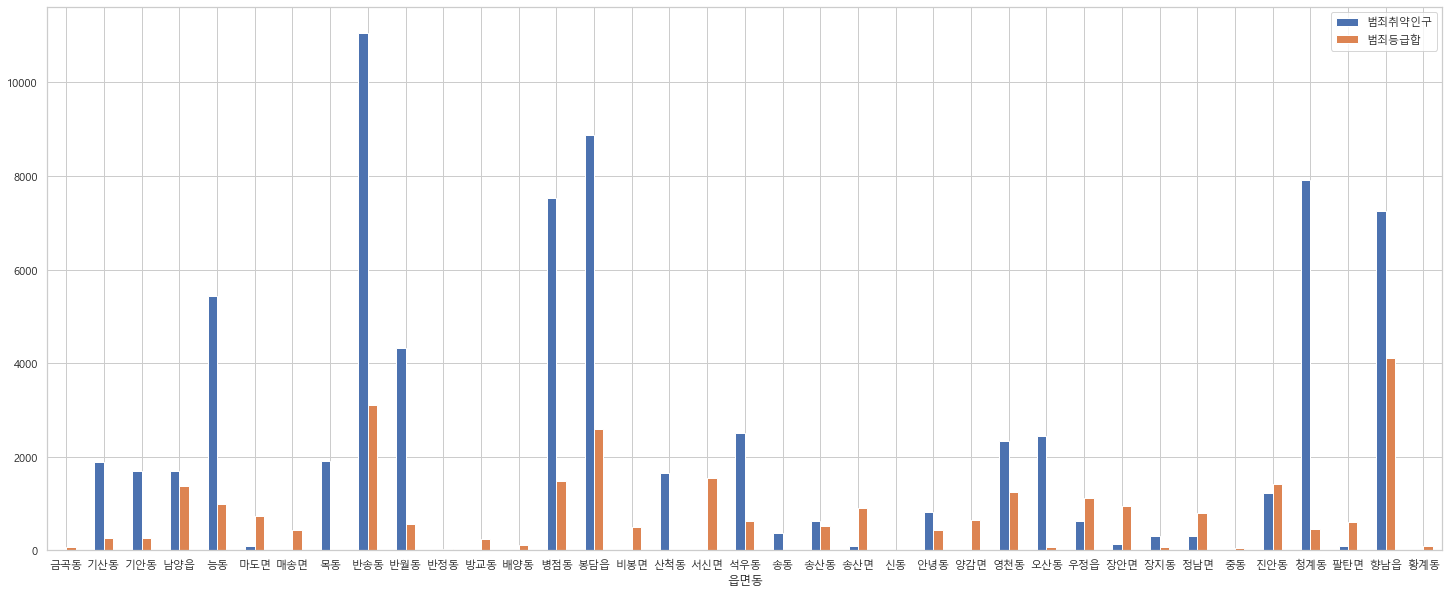

In [182]:
#범죄취약여성유동, 범죄등급합 한눈에 보기
plt.rcParams["figure.figsize"] = (25,10)
woman = list(cctv2['범죄취약인구'])
crime_grade = list(cctv2['범죄등급합']) #상가갯수와 범죄등급의 scale을 맞추기 위함
index = cctv2['읍면동']
df = pd.DataFrame({'범죄취약인구': woman,'범죄등급합': crime_grade}, index=index)
ax = df.plot.bar(rot=0)

## 6.감시취약지수 분석

### 6-1.감시취약지수와 상가 관계

Text(438.64700000000005, 1, '금곡동')

Text(515.8589999999999, 7, '기산동')

Text(623.522, 9, '기안동')

Text(6110.052000000001, 88, '남양읍')

Text(1492.047999999999, 30, '능동')

Text(2783.4870000000005, 13, '마도면')

Text(1573.0919999999994, 10, '매송면')

Text(682.6429999999999, 1, '목동')

Text(2056.352, 249, '반송동')

Text(1067.8609999999999, 27, '반월동')

Text(262.283, 0, '반정동')

Text(175.211, 18, '방교동')

Text(334.09400000000005, 0, '배양동')

Text(1139.2749999999992, 125, '병점동')

Text(4739.560999999997, 143, '봉담읍')

Text(2281.836, 10, '비봉면')

Text(631.6450000000001, 2, '산척동')

Text(3604.0409999999983, 88, '서신면')

Text(468.136, 35, '석우동')

Text(261.18499999999995, 1, '송동')

Text(524.3299999999998, 4, '송산동')

Text(4184.2080000000005, 36, '송산면')

Text(78.826, 0, '신동')

Text(922.0760000000002, 20, '안녕동')

Text(2020.195, 3, '양감면')

Text(1120.6310000000003, 10, '영천동')

Text(719.2779999999999, 6, '오산동')

Text(5416.613999999998, 80, '우정읍')

Text(4162.967, 23, '장안면')

Text(703.0429999999998, 2, '장지동')

Text(4339.567999999997, 23, '정남면')

Text(158.255, 1, '중동')

Text(761.647, 187, '진안동')

Text(1222.7660000000003, 6, '청계동')

Text(4559.917, 41, '팔탄면')

Text(5615.427999999999, 257, '향남읍')

Text(259.262, 0, '황계동')

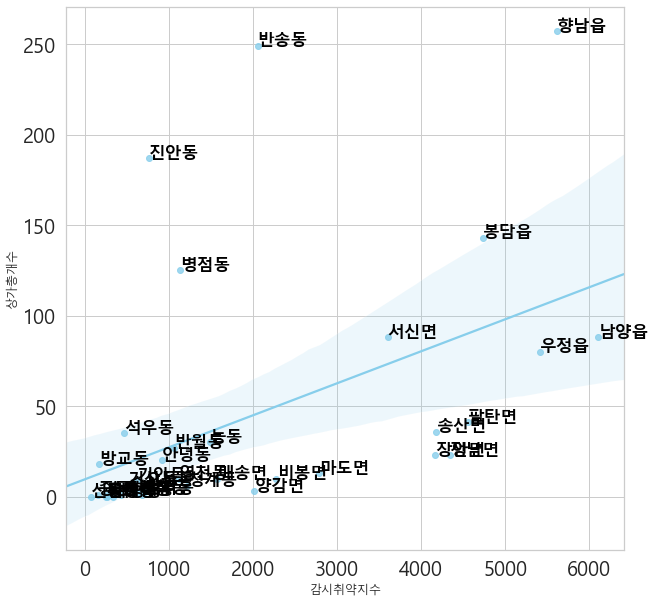

In [19]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='상가총개수',units='읍면동',data=cctv_emd,marker="o", color="skyblue")

for line in range(0,cctv_emd.shape[0]):
     p1.text(cctv_emd['감시취약지수'][line]+1, cctv_emd['상가총개수'][line], cctv_emd['읍면동'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

Text(677.5140000000001, 2, '가재리')

Text(81.516, 0, '갈천리')

Text(272.37800000000004, 0, '계향리')

Text(149.124, 0, '고모리')

Text(301.918, 0, '고정리')

Text(223.199, 0, '고주리')

Text(125.501, 0, '고지리')

Text(410.271, 3, '고포리')

Text(109.87100000000001, 1, '관리')

Text(288.628, 0, '관항리')

Text(268.579, 0, '광평리')

Text(495.362, 1, '괘랑리')

Text(384.5670000000001, 7, '구문천리')

Text(531.5420000000001, 6, '구장리')

Text(330.717, 1, '구포리')

Text(71.0, 7, '국화리')

Text(525.153, 9, '궁평리')

Text(142.869, 0, '귀래리')

Text(235.502, 0, '금당리')

Text(108.884, 0, '금복리')

Text(181.30499999999998, 1, '금의리')

Text(499.41799999999995, 0, '기천리')

Text(61.385000000000005, 1, '길성리')

Text(1860.3940000000002, 82, '남양리')

Text(249.36599999999999, 1, '남전리')

Text(284.55799999999994, 0, '내리')

Text(359.17299999999994, 0, '노진리')

Text(445.63599999999997, 1, '노하리')

Text(192.156, 0, '당하리')

Text(435.6020000000001, 0, '대양리')

Text(150.791, 0, '덕다리')

Text(187.579, 0, '덕리')

Text(403.52500000000003, 2, '덕우리')

Text(258.19599999999997, 2, '덕절리')

Text(208.313, 10, '덕천리')

Text(278.543, 2, '도이리')

Text(574.6700000000001, 0, '독정리')

Text(334.091, 0, '독지리')

Text(123.381, 1, '동오리')

Text(758.2480000000002, 44, '동화리')

Text(333.23800000000006, 6, '두곡리')

Text(235.186, 0, '마산리')

Text(185.018, 1, '마하리')

Text(111.38900000000001, 0, '망월리')

Text(156.015, 4, '매곡리')

Text(661.0319999999999, 8, '매향리')

Text(376.52000000000004, 3, '매화리')

Text(273.61199999999997, 0, '멱우리')

Text(384.712, 0, '무송리')

Text(400.416, 0, '문학리')

Text(182.792, 0, '문호리')

Text(200.802, 1, '발산리')

Text(213.06600000000006, 23, '발안리')

Text(149.23, 2, '방축리')

Text(141.189, 0, '백곡리')

Text(225.153, 1, '백리')

Text(224.317, 2, '백미리')

Text(172.451, 0, '백토리')

Text(603.8299999999999, 11, '보통리')

Text(445.15599999999995, 6, '봉가리')

Text(347.5990000000001, 1, '북양리')

Text(335.83700000000005, 2, '분천리')

Text(373.027, 25, '사강리')

Text(843.556, 10, '사곡리')

Text(96.212, 0, '사곳리')

Text(269.789, 1, '사랑리')

Text(276.067, 0, '사창리')

Text(476.71999999999997, 0, '삼존리')

Text(412.48799999999994, 0, '삼화리')

Text(265.475, 0, '상기리')

Text(74.35999999999999, 0, '상두리')

Text(315.05900000000014, 13, '상리')

Text(725.5590000000001, 3, '상신리')

Text(302.835, 6, '상안리')

Text(121.682, 3, '서근리')

Text(325.06600000000014, 2, '석교리')

Text(303.40099999999995, 2, '석천리')

Text(607.6799999999998, 8, '석포리')

Text(148.04, 0, '세곡리')

Text(116.511, 3, '송곡리')

Text(394.2960000000001, 3, '송교리')

Text(166.781, 0, '송라리')

Text(262.251, 1, '송림리')

Text(443.02400000000006, 0, '송산리')

Text(310.465, 0, '송정리')

Text(417.228, 12, '수기리')

Text(133.35, 0, '수면리')

Text(315.088, 8, '수영리')

Text(125.97199999999998, 0, '수직리')

Text(548.154, 6, '수촌리')

Text(215.83, 0, '수화리')

Text(131.79899999999998, 0, '숙곡리')

Text(160.73100000000002, 0, '슬항리')

Text(130.62900000000002, 0, '시리')

Text(791.8589999999998, 2, '신남리')

Text(428.34499999999997, 7, '신리')

Text(342.89400000000006, 0, '신왕리')

Text(173.534, 0, '신외리')

Text(127.44599999999998, 0, '신천리')

Text(346.008, 4, '쌍송리')

Text(246.0, 0, '쌍정리')

Text(330.01899999999995, 0, '쌍학리')

Text(284.028, 0, '안석리')

Text(306.275, 0, '야목리')

Text(321.47200000000004, 7, '양노리')

Text(500.856, 3, '어은리')

Text(204.88699999999997, 3, '어천리')

Text(109.157, 0, '오일리')

Text(219.244, 0, '온석리')

Text(733.227, 67, '와우리')

Text(283.41299999999995, 4, '왕림리')

Text(287.56600000000003, 1, '요당리')

Text(107.6, 3, '요리')

Text(396.964, 0, '용두리')

Text(235.36399999999998, 1, '용소리')

Text(76.527, 0, '용수리')

Text(204.61599999999999, 0, '용포리')

Text(380.55899999999997, 1, '운평리')

Text(146.307, 2, '원리')

Text(206.97500000000002, 0, '원안리')

Text(198.207, 0, '원천리')

Text(324.91200000000003, 4, '원평리')

Text(141.993, 5, '월문리')

Text(208.001, 2, '유리')

Text(161.565, 0, '유포리')

Text(436.017, 1, '육일리')

Text(474.858, 5, '율암리')

Text(163.31799999999998, 0, '음양리')

Text(397.8270000000001, 0, '이화리')

Text(246.924, 2, '자안리')

Text(486.22999999999996, 1, '장덕리')

Text(506.787, 0, '장안리')

Text(327.442, 1, '장외리')

Text(181.0, 0, '장전리')

Text(264.983, 6, '장짐리')

Text(257.049, 4, '전곡리')

Text(118.026, 1, '정문리')

Text(139.12800000000001, 0, '제기리')

Text(311.904, 60, '제부리')

Text(146.666, 3, '제암리')

Text(779.5680000000001, 55, '조암리')

Text(453.25200000000007, 2, '주곡리')

Text(204.03600000000003, 1, '중송리')

Text(99.76599999999999, 0, '증거리')

Text(141.0, 0, '지월리')

Text(163.742, 0, '지화리')

Text(216.48399999999998, 0, '창곡리')

Text(159.526, 0, '천등리')

Text(306.8260000000001, 1, '천천리')

Text(268.72400000000005, 0, '청요리')

Text(531.1989999999998, 0, '청원리')

Text(147.603, 0, '칠곡리')

Text(78.32100000000001, 63, '평리')

Text(113.215, 0, '하가등리')

Text(894.8009999999999, 64, '하길리')

Text(297.01099999999997, 1, '하저리')

Text(121.667, 0, '한각리')

Text(182.81799999999998, 1, '해문리')

Text(171.45099999999996, 0, '해창리')

Text(1057.826, 75, '행정리')

Text(471.725, 0, '호곡리')

Text(143.76999999999998, 0, '홍법리')

Text(114.699, 0, '화당리')

Text(125.27, 0, '화리현리')

Text(627.7329999999998, 2, '화산리')

Text(426.07900000000006, 0, '화수리')

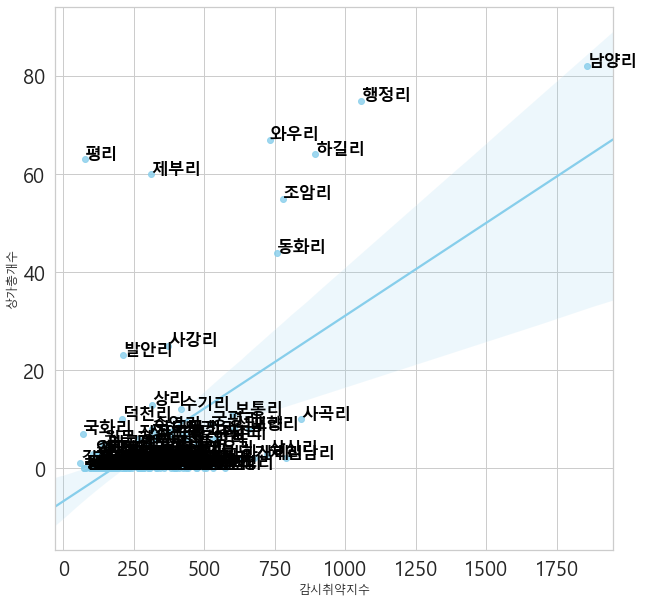

In [20]:
#법정리별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

plt.rcParams["figure.figsize"] = (10,10)
p1 = sns.regplot(x="감시취약지수",y='상가총개수',units='법정리',data=cctv_li,marker="o", color="skyblue")

for line in range(1,cctv_li.shape[0]):
     p1.text(cctv_li['감시취약지수'][line]+1, cctv_li['상가총개수'][line], cctv_li['법정리'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

### 6-2.감시취약지수와 조회CCTV 관계

Text(438.64700000000005, 31, '금곡동')

Text(515.8589999999999, 121, '기산동')

Text(623.522, 150, '기안동')

Text(6110.052000000001, 609, '남양읍')

Text(1492.047999999999, 623, '능동')

Text(2783.4870000000005, 338, '마도면')

Text(1573.0919999999994, 186, '매송면')

Text(682.6429999999999, 9, '목동')

Text(2056.352, 1376, '반송동')

Text(1067.8609999999999, 249, '반월동')

Text(262.283, 20, '반정동')

Text(175.211, 113, '방교동')

Text(334.09400000000005, 48, '배양동')

Text(1139.2749999999992, 739, '병점동')

Text(4739.560999999997, 1150, '봉담읍')

Text(2281.836, 209, '비봉면')

Text(631.6450000000001, 6, '산척동')

Text(3604.0409999999983, 626, '서신면')

Text(468.136, 366, '석우동')

Text(261.18499999999995, 6, '송동')

Text(524.3299999999998, 260, '송산동')

Text(4184.2080000000005, 402, '송산면')

Text(78.826, 0, '신동')

Text(922.0760000000002, 263, '안녕동')

Text(2020.195, 282, '양감면')

Text(1120.6310000000003, 547, '영천동')

Text(719.2779999999999, 29, '오산동')

Text(5416.613999999998, 533, '우정읍')

Text(4162.967, 439, '장안면')

Text(703.0429999999998, 21, '장지동')

Text(4339.567999999997, 364, '정남면')

Text(158.255, 25, '중동')

Text(761.647, 806, '진안동')

Text(1222.7660000000003, 226, '청계동')

Text(4559.917, 270, '팔탄면')

Text(5615.427999999999, 1774, '향남읍')

Text(259.262, 41, '황계동')

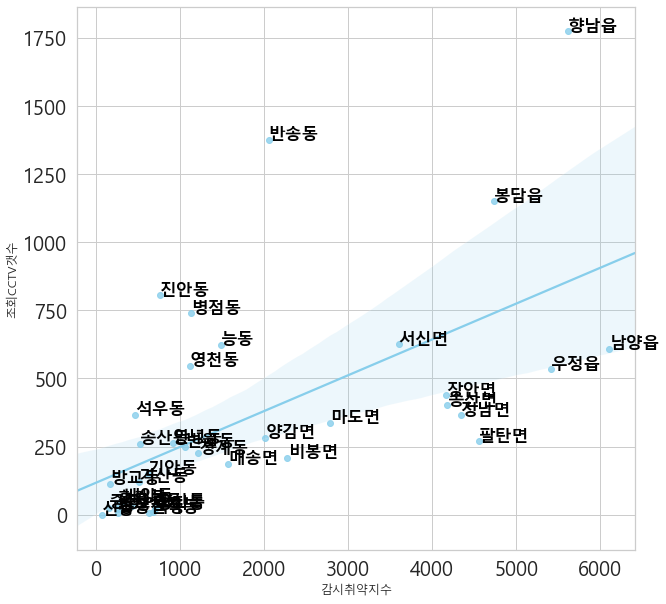

In [25]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='조회CCTV갯수',data=cctv_emd,marker="o", color="skyblue")

for line in range(0,cctv_emd.shape[0]):
     p1.text(cctv_emd['감시취약지수'][line]+1, cctv_emd['조회CCTV갯수'][line], cctv_emd['읍면동'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

Text(677.5140000000001, 28, '가재리')

Text(81.516, 21, '갈천리')

Text(272.37800000000004, 16, '계향리')

Text(149.124, 5, '고모리')

Text(301.918, 10, '고정리')

Text(223.199, 19, '고주리')

Text(125.501, 1, '고지리')

Text(410.271, 7, '고포리')

Text(109.87100000000001, 15, '관리')

Text(288.628, 9, '관항리')

Text(268.579, 22, '광평리')

Text(495.362, 61, '괘랑리')

Text(384.5670000000001, 88, '구문천리')

Text(531.5420000000001, 47, '구장리')

Text(330.717, 35, '구포리')

Text(71.0, 0, '국화리')

Text(525.153, 55, '궁평리')

Text(142.869, 3, '귀래리')

Text(235.502, 18, '금당리')

Text(108.884, 1, '금복리')

Text(181.30499999999998, 49, '금의리')

Text(499.41799999999995, 23, '기천리')

Text(61.385000000000005, 2, '길성리')

Text(1860.3940000000002, 459, '남양리')

Text(249.36599999999999, 0, '남전리')

Text(284.55799999999994, 16, '내리')

Text(359.17299999999994, 53, '노진리')

Text(445.63599999999997, 10, '노하리')

Text(192.156, 37, '당하리')

Text(435.6020000000001, 35, '대양리')

Text(150.791, 2, '덕다리')

Text(187.579, 26, '덕리')

Text(403.52500000000003, 7, '덕우리')

Text(258.19599999999997, 28, '덕절리')

Text(208.313, 12, '덕천리')

Text(278.543, 25, '도이리')

Text(574.6700000000001, 59, '독정리')

Text(334.091, 1, '독지리')

Text(123.381, 5, '동오리')

Text(758.2480000000002, 288, '동화리')

Text(333.23800000000006, 137, '두곡리')

Text(235.186, 5, '마산리')

Text(185.018, 8, '마하리')

Text(111.38900000000001, 4, '망월리')

Text(156.015, 13, '매곡리')

Text(661.0319999999999, 42, '매향리')

Text(376.52000000000004, 121, '매화리')

Text(273.61199999999997, 4, '멱우리')

Text(384.712, 15, '무송리')

Text(400.416, 27, '문학리')

Text(182.792, 0, '문호리')

Text(200.802, 2, '발산리')

Text(213.06600000000006, 207, '발안리')

Text(149.23, 67, '방축리')

Text(141.189, 12, '백곡리')

Text(225.153, 10, '백리')

Text(224.317, 11, '백미리')

Text(172.451, 5, '백토리')

Text(603.8299999999999, 59, '보통리')

Text(445.15599999999995, 48, '봉가리')

Text(347.5990000000001, 53, '북양리')

Text(335.83700000000005, 50, '분천리')

Text(373.027, 199, '사강리')

Text(843.556, 120, '사곡리')

Text(96.212, 12, '사곳리')

Text(269.789, 8, '사랑리')

Text(276.067, 16, '사창리')

Text(476.71999999999997, 74, '삼존리')

Text(412.48799999999994, 35, '삼화리')

Text(265.475, 4, '상기리')

Text(74.35999999999999, 5, '상두리')

Text(315.05900000000014, 107, '상리')

Text(725.5590000000001, 132, '상신리')

Text(302.835, 12, '상안리')

Text(121.682, 19, '서근리')

Text(325.06600000000014, 56, '석교리')

Text(303.40099999999995, 16, '석천리')

Text(607.6799999999998, 42, '석포리')

Text(148.04, 2, '세곡리')

Text(116.511, 15, '송곡리')

Text(394.2960000000001, 33, '송교리')

Text(166.781, 8, '송라리')

Text(262.251, 1, '송림리')

Text(443.02400000000006, 115, '송산리')

Text(310.465, 6, '송정리')

Text(417.228, 89, '수기리')

Text(133.35, 1, '수면리')

Text(315.088, 95, '수영리')

Text(125.97199999999998, 27, '수직리')

Text(548.154, 27, '수촌리')

Text(215.83, 5, '수화리')

Text(131.79899999999998, 5, '숙곡리')

Text(160.73100000000002, 17, '슬항리')

Text(130.62900000000002, 0, '시리')

Text(791.8589999999998, 27, '신남리')

Text(428.34499999999997, 64, '신리')

Text(342.89400000000006, 83, '신왕리')

Text(173.534, 10, '신외리')

Text(127.44599999999998, 9, '신천리')

Text(346.008, 34, '쌍송리')

Text(246.0, 3, '쌍정리')

Text(330.01899999999995, 30, '쌍학리')

Text(284.028, 13, '안석리')

Text(306.275, 9, '야목리')

Text(321.47200000000004, 61, '양노리')

Text(500.856, 107, '어은리')

Text(204.88699999999997, 19, '어천리')

Text(109.157, 13, '오일리')

Text(219.244, 1, '온석리')

Text(733.227, 480, '와우리')

Text(283.41299999999995, 37, '왕림리')

Text(287.56600000000003, 25, '요당리')

Text(107.6, 6, '요리')

Text(396.964, 14, '용두리')

Text(235.36399999999998, 43, '용소리')

Text(76.527, 28, '용수리')

Text(204.61599999999999, 24, '용포리')

Text(380.55899999999997, 12, '운평리')

Text(146.307, 18, '원리')

Text(206.97500000000002, 0, '원안리')

Text(198.207, 13, '원천리')

Text(324.91200000000003, 44, '원평리')

Text(141.993, 7, '월문리')

Text(208.001, 36, '유리')

Text(161.565, 7, '유포리')

Text(436.017, 14, '육일리')

Text(474.858, 35, '율암리')

Text(163.31799999999998, 8, '음양리')

Text(397.8270000000001, 36, '이화리')

Text(246.924, 28, '자안리')

Text(486.22999999999996, 5, '장덕리')

Text(506.787, 51, '장안리')

Text(327.442, 21, '장외리')

Text(181.0, 1, '장전리')

Text(264.983, 136, '장짐리')

Text(257.049, 246, '전곡리')

Text(118.026, 14, '정문리')

Text(139.12800000000001, 23, '제기리')

Text(311.904, 36, '제부리')

Text(146.666, 31, '제암리')

Text(779.5680000000001, 242, '조암리')

Text(453.25200000000007, 37, '주곡리')

Text(204.03600000000003, 22, '중송리')

Text(99.76599999999999, 4, '증거리')

Text(141.0, 1, '지월리')

Text(163.742, 9, '지화리')

Text(216.48399999999998, 24, '창곡리')

Text(159.526, 0, '천등리')

Text(306.8260000000001, 89, '천천리')

Text(268.72400000000005, 11, '청요리')

Text(531.1989999999998, 22, '청원리')

Text(147.603, 1, '칠곡리')

Text(78.32100000000001, 124, '평리')

Text(113.215, 1, '하가등리')

Text(894.8009999999999, 62, '하길리')

Text(297.01099999999997, 16, '하저리')

Text(121.667, 10, '한각리')

Text(182.81799999999998, 7, '해문리')

Text(171.45099999999996, 10, '해창리')

Text(1057.826, 745, '행정리')

Text(471.725, 12, '호곡리')

Text(143.76999999999998, 43, '홍법리')

Text(114.699, 2, '화당리')

Text(125.27, 1, '화리현리')

Text(627.7329999999998, 33, '화산리')

Text(426.07900000000006, 20, '화수리')

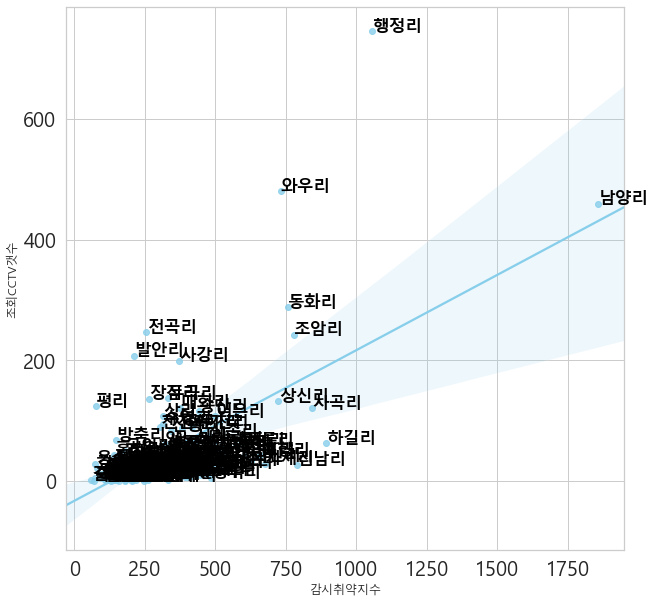

In [28]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='조회CCTV갯수',data=cctv_li,marker="o", color="skyblue")

for line in range(1,cctv_li.shape[0]):
     p1.text(cctv_li['감시취약지수'][line]+1, cctv_li['조회CCTV갯수'][line], cctv_li['법정리'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

### 6-3. 감시취약지수와 심야유동인구 관계

Text(438.64700000000005, 747.6158359999997, '금곡동')

Text(515.8589999999999, 3382.5141670000003, '기산동')

Text(623.522, 3305.704998000002, '기안동')

Text(6110.052000000001, 9948.132478000038, '남양읍')

Text(1492.047999999999, 9382.355834000004, '능동')

Text(2783.4870000000005, 4950.816640000015, '마도면')

Text(1573.0919999999994, 7122.909987000017, '매송면')

Text(682.6429999999999, 612.6175000000003, '목동')

Text(2056.352, 19016.468331999982, '반송동')

Text(1067.8609999999999, 10757.012498, '반월동')

Text(262.283, 1434.986666000001, '반정동')

Text(175.211, 3143.967494999999, '방교동')

Text(334.09400000000005, 439.55666099999974, '배양동')

Text(1139.2749999999992, 8337.400832000007, '병점동')

Text(4739.560999999997, 21335.048334000014, '봉담읍')

Text(2281.836, 7469.035828000005, '비봉면')

Text(631.6450000000001, 813.8008349999999, '산척동')

Text(3604.0409999999983, 4441.454148000014, '서신면')

Text(468.136, 10028.603330000004, '석우동')

Text(261.18499999999995, 1799.8150000000003, '송동')

Text(524.3299999999998, 2252.3883299999998, '송산동')

Text(4184.2080000000005, 6136.336648999999, '송산면')

Text(78.826, 483.15250999999967, '신동')

Text(922.0760000000002, 5528.739161999998, '안녕동')

Text(2020.195, 4257.984153000008, '양감면')

Text(1120.6310000000003, 9173.12333, '영천동')

Text(719.2779999999999, 5852.637491000001, '오산동')

Text(5416.613999999998, 14250.452519000028, '우정읍')

Text(4162.967, 8592.411637000023, '장안면')

Text(703.0429999999998, 1417.1741750000015, '장지동')

Text(4339.567999999997, 7176.23583899999, '정남면')

Text(158.255, 613.480003, '중동')

Text(761.647, 7264.43, '진안동')

Text(1222.7660000000003, 7972.929160000004, '청계동')

Text(4559.917, 14920.58832199999, '팔탄면')

Text(5615.427999999999, 18877.158335000044, '향남읍')

Text(259.262, 355.7849970000001, '황계동')

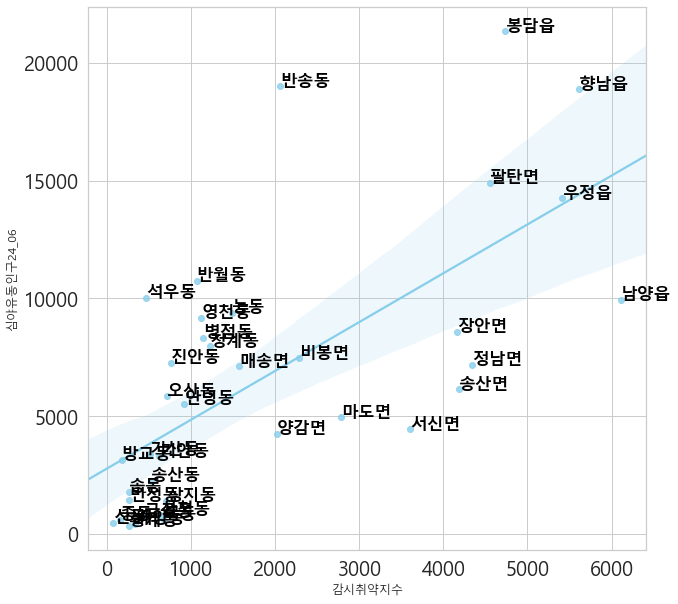

In [29]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='심야유동인구24_06',data=cctv_emd,marker="o", color="skyblue")

for line in range(0,cctv_emd.shape[0]):
     p1.text(cctv_emd['감시취약지수'][line]+1, cctv_emd['심야유동인구24_06'][line], cctv_emd['읍면동'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

Text(677.5140000000001, 1511.9016659999993, '가재리')

Text(81.516, 93.01916600000001, '갈천리')

Text(272.37800000000004, 339.88582899999983, '계향리')

Text(149.124, 197.41583000000003, '고모리')

Text(301.918, 1157.8425010000005, '고정리')

Text(223.199, 504.3983440000001, '고주리')

Text(125.501, 110.96666499999999, '고지리')

Text(410.271, 269.6941609999999, '고포리')

Text(109.87100000000001, 560.2125040000001, '관리')

Text(288.628, 189.880004, '관항리')

Text(268.579, 246.92916299999996, '광평리')

Text(495.362, 1153.7325010000006, '괘랑리')

Text(384.5670000000001, 1784.7691650000002, '구문천리')

Text(531.5420000000001, 1608.9366610000015, '구장리')

Text(330.717, 1532.1416730000003, '구포리')

Text(71.0, 0.0, '국화리')

Text(525.153, 387.097503, '궁평리')

Text(142.869, 445.50000699999975, '귀래리')

Text(235.502, 112.132496, '금당리')

Text(108.884, 106.93333599999998, '금복리')

Text(181.30499999999998, 2532.1424980000047, '금의리')

Text(499.41799999999995, 161.0349889999997, '기천리')

Text(61.385000000000005, 12.318332000000003, '길성리')

Text(1860.3940000000002, 5215.115824999997, '남양리')

Text(249.36599999999999, 29.318336000000013, '남전리')

Text(284.55799999999994, 192.33332, '내리')

Text(359.17299999999994, 377.6641669999998, '노진리')

Text(445.63599999999997, 783.8708320000002, '노하리')

Text(192.156, 636.4933340000002, '당하리')

Text(435.6020000000001, 370.4883389999994, '대양리')

Text(150.791, 67.02666100000002, '덕다리')

Text(187.579, 689.5283310000002, '덕리')

Text(403.52500000000003, 945.3408359999999, '덕우리')

Text(258.19599999999997, 780.1541650000001, '덕절리')

Text(208.313, 1664.0149999999999, '덕천리')

Text(278.543, 335.21083599999974, '도이리')

Text(574.6700000000001, 1559.4133260000015, '독정리')

Text(334.091, 72.822501, '독지리')

Text(123.381, 421.99833399999994, '동오리')

Text(758.2480000000002, 6131.493323999999, '동화리')

Text(333.23800000000006, 1021.9691710000005, '두곡리')

Text(235.186, 181.04499799999988, '마산리')

Text(185.018, 116.70416699999998, '마하리')

Text(111.38900000000001, 238.02416500000007, '망월리')

Text(156.015, 1092.5000000000002, '매곡리')

Text(661.0319999999999, 1423.064992000001, '매향리')

Text(376.52000000000004, 666.755832, '매화리')

Text(273.61199999999997, 447.45083199999965, '멱우리')

Text(384.712, 548.2000099999998, '무송리')

Text(400.416, 280.4841619999998, '문학리')

Text(182.792, 53.58583200000001, '문호리')

Text(200.802, 150.02083600000003, '발산리')

Text(213.06600000000006, 1108.1233329999998, '발안리')

Text(149.23, 465.5233349999999, '방축리')

Text(141.189, 23.73166600000001, '백곡리')

Text(225.153, 142.22166799999988, '백리')

Text(224.317, 200.3249979999998, '백미리')

Text(172.451, 206.43833399999988, '백토리')

Text(603.8299999999999, 1654.1166670000005, '보통리')

Text(445.15599999999995, 727.7808309999999, '봉가리')

Text(347.5990000000001, 939.3824990000002, '북양리')

Text(335.83700000000005, 817.5800009999997, '분천리')

Text(373.027, 780.6949989999999, '사강리')

Text(843.556, 1593.3966659999996, '사곡리')

Text(96.212, 34.41416399999999, '사곳리')

Text(269.789, 117.55082599999999, '사랑리')

Text(276.067, 657.664172, '사창리')

Text(476.71999999999997, 2620.5816599999985, '삼존리')

Text(412.48799999999994, 838.024154, '삼화리')

Text(265.475, 136.51166899999998, '상기리')

Text(74.35999999999999, 24.496665, '상두리')

Text(315.05900000000014, 1559.6708350000001, '상리')

Text(725.5590000000001, 2483.3833260000015, '상신리')

Text(302.835, 362.8816629999998, '상안리')

Text(121.682, 301.4874999999999, '서근리')

Text(325.06600000000014, 452.01749599999994, '석교리')

Text(303.40099999999995, 3046.029996000002, '석천리')

Text(607.6799999999998, 1485.8941640000025, '석포리')

Text(148.04, 145.81333100000003, '세곡리')

Text(116.511, 183.80750199999994, '송곡리')

Text(394.2960000000001, 688.0475060000002, '송교리')

Text(166.781, 1619.0241630000003, '송라리')

Text(262.251, 135.24249399999997, '송림리')

Text(443.02400000000006, 2180.361662, '송산리')

Text(310.465, 113.538334, '송정리')

Text(417.228, 1183.9616709999998, '수기리')

Text(133.35, 32.14416800000001, '수면리')

Text(315.088, 2452.4358429999984, '수영리')

Text(125.97199999999998, 365.66416300000003, '수직리')

Text(548.154, 1139.3941560000003, '수촌리')

Text(215.83, 66.492495, '수화리')

Text(131.79899999999998, 211.00916499999994, '숙곡리')

Text(160.73100000000002, 456.423332, '슬항리')

Text(130.62900000000002, 16.203331999999993, '시리')

Text(791.8589999999998, 823.678334, '신남리')

Text(428.34499999999997, 841.0683360000002, '신리')

Text(342.89400000000006, 511.4424899999994, '신왕리')

Text(173.534, 124.33499899999994, '신외리')

Text(127.44599999999998, 25.019167000000007, '신천리')

Text(346.008, 1097.830000000001, '쌍송리')

Text(246.0, 118.44500299999999, '쌍정리')

Text(330.01899999999995, 1074.7483280000006, '쌍학리')

Text(284.028, 304.2591669999998, '안석리')

Text(306.275, 1923.9391670000014, '야목리')

Text(321.47200000000004, 2386.5825000000004, '양노리')

Text(500.856, 914.5858280000003, '어은리')

Text(204.88699999999997, 475.54999099999947, '어천리')

Text(109.157, 74.78416700000002, '오일리')

Text(219.244, 249.09333599999994, '온석리')

Text(733.227, 5606.905001999997, '와우리')

Text(283.41299999999995, 1474.6541730000008, '왕림리')

Text(287.56600000000003, 591.9441629999997, '요당리')

Text(107.6, 106.74750199999995, '요리')

Text(396.964, 140.30583299999984, '용두리')

Text(235.36399999999998, 525.338333, '용소리')

Text(76.527, 388.00833199999994, '용수리')

Text(204.61599999999999, 214.88083699999999, '용포리')

Text(380.55899999999997, 163.3508379999999, '운평리')

Text(146.307, 459.85416599999985, '원리')

Text(206.97500000000002, 80.74416399999994, '원안리')

Text(198.207, 74.83916199999997, '원천리')

Text(324.91200000000003, 849.8533380000008, '원평리')

Text(141.993, 268.69583100000006, '월문리')

Text(208.001, 618.984996, '유리')

Text(161.565, 281.69166799999994, '유포리')

Text(436.017, 243.113328, '육일리')

Text(474.858, 3699.9058340000006, '율암리')

Text(163.31799999999998, 208.98083199999985, '음양리')

Text(397.8270000000001, 2285.3900049999984, '이화리')

Text(246.924, 1192.651665, '자안리')

Text(486.22999999999996, 962.4050030000005, '장덕리')

Text(506.787, 895.4016719999997, '장안리')

Text(327.442, 301.685829, '장외리')

Text(181.0, 33.06916700000001, '장전리')

Text(264.983, 1071.2033350000002, '장짐리')

Text(257.049, 831.3608299999993, '전곡리')

Text(118.026, 144.8941629999999, '정문리')

Text(139.12800000000001, 175.57083500000007, '제기리')

Text(311.904, 512.8258309999998, '제부리')

Text(146.666, 671.2524999999998, '제암리')

Text(779.5680000000001, 1754.0016739999996, '조암리')

Text(453.25200000000007, 916.4658430000001, '주곡리')

Text(204.03600000000003, 133.42499299999992, '중송리')

Text(99.76599999999999, 167.96999699999998, '증거리')

Text(141.0, 733.0874979999998, '지월리')

Text(163.742, 127.83083699999997, '지화리')

Text(216.48399999999998, 743.2816679999992, '창곡리')

Text(159.526, 53.41416599999998, '천등리')

Text(306.8260000000001, 2045.4508330000006, '천천리')

Text(268.72400000000005, 161.38416999999993, '청요리')

Text(531.1989999999998, 824.7099910000001, '청원리')

Text(147.603, 36.03249800000001, '칠곡리')

Text(78.32100000000001, 748.813335, '평리')

Text(113.215, 77.924998, '하가등리')

Text(894.8009999999999, 2561.3183350000018, '하길리')

Text(297.01099999999997, 995.2108270000001, '하저리')

Text(121.667, 262.4083339999999, '한각리')

Text(182.81799999999998, 30.100830000000002, '해문리')

Text(171.45099999999996, 374.6200049999998, '해창리')

Text(1057.826, 4332.067497, '행정리')

Text(471.725, 168.92083000000002, '호곡리')

Text(143.76999999999998, 86.37832999999996, '홍법리')

Text(114.699, 199.5074989999999, '화당리')

Text(125.27, 82.2258349999999, '화리현리')

Text(627.7329999999998, 1663.4575160000006, '화산리')

Text(426.07900000000006, 199.7191659999998, '화수리')

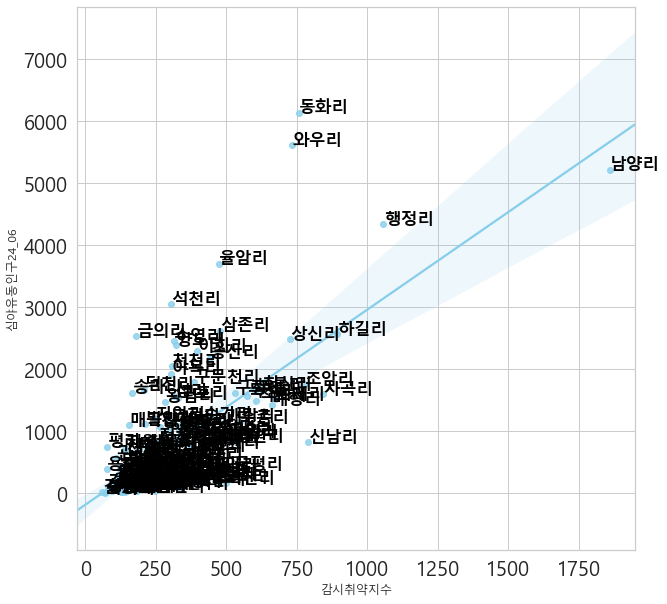

In [30]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='심야유동인구24_06',data=cctv_li,marker="o", color="skyblue")

for line in range(1,cctv_li.shape[0]):
     p1.text(cctv_li['감시취약지수'][line]+1, cctv_li['심야유동인구24_06'][line], cctv_li['법정리'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

### 6-5. 감시취약지수와 야간유동인구 관계

Text(438.64700000000005, 3186.4766649999992, '금곡동')

Text(515.8589999999999, 12803.022500999996, '기산동')

Text(623.522, 12576.411675999998, '기안동')

Text(6110.052000000001, 43991.210009999886, '남양읍')

Text(1492.047999999999, 41759.26333100002, '능동')

Text(2783.4870000000005, 19854.750003999994, '마도면')

Text(1573.0919999999994, 27804.355838000058, '매송면')

Text(682.6429999999999, 1781.4050059999997, '목동')

Text(2056.352, 88576.20333100004, '반송동')

Text(1067.8609999999999, 40089.67333099997, '반월동')

Text(262.283, 5754.1575040000025, '반정동')

Text(175.211, 12196.929175000001, '방교동')

Text(334.09400000000005, 1588.2216690000012, '배양동')

Text(1139.2749999999992, 42990.25249199999, '병점동')

Text(4739.560999999997, 94575.82669100013, '봉담읍')

Text(2281.836, 33735.23499199999, '비봉면')

Text(631.6450000000001, 2217.2325000000023, '산척동')

Text(3604.0409999999983, 13893.286683000018, '서신면')

Text(468.136, 41498.878331, '석우동')

Text(261.18499999999995, 6679.026667000006, '송동')

Text(524.3299999999998, 9411.155014, '송산동')

Text(4184.2080000000005, 25229.52665999999, '송산면')

Text(78.826, 717.1841800000004, '신동')

Text(922.0760000000002, 23868.438331999994, '안녕동')

Text(2020.195, 19145.854154000037, '양감면')

Text(1120.6310000000003, 38467.927507, '영천동')

Text(719.2779999999999, 25787.640832000005, '오산동')

Text(5416.613999999998, 30918.501689999975, '우정읍')

Text(4162.967, 26068.443334000018, '장안면')

Text(703.0429999999998, 3691.6083300000014, '장지동')

Text(4339.567999999997, 35421.81998999995, '정남면')

Text(158.255, 1804.3149980000007, '중동')

Text(761.647, 37873.204168000004, '진안동')

Text(1222.7660000000003, 31124.805833000002, '청계동')

Text(4559.917, 61979.12747700016, '팔탄면')

Text(5615.427999999999, 85029.75915100068, '향남읍')

Text(259.262, 1454.810003, '황계동')

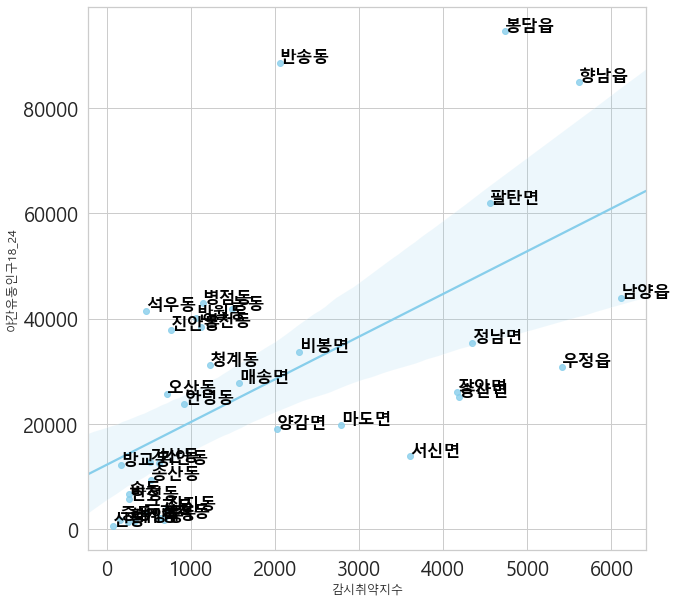

In [32]:
#읍면동별 관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='야간유동인구18_24',data=cctv_emd,marker="o", color="skyblue")

for line in range(0,cctv_emd.shape[0]):
     p1.text(cctv_emd['감시취약지수'][line]+1, cctv_emd['야간유동인구18_24'][line], cctv_emd['읍면동'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

Text(677.5140000000001, 6032.939997000003, '가재리')

Text(81.516, 342.606665, '갈천리')

Text(272.37800000000004, 1763.940006, '계향리')

Text(149.124, 495.0583399999999, '고모리')

Text(301.918, 4316.633331000004, '고정리')

Text(223.199, 3023.689999999999, '고주리')

Text(125.501, 518.0350039999996, '고지리')

Text(410.271, 733.7583330000003, '고포리')

Text(109.87100000000001, 2694.9441620000002, '관리')

Text(288.628, 853.1733369999998, '관항리')

Text(268.579, 763.9008319999996, '광평리')

Text(495.362, 6668.764988000002, '괘랑리')

Text(384.5670000000001, 6605.80499700001, '구문천리')

Text(531.5420000000001, 7523.929155999999, '구장리')

Text(330.717, 6416.489161999998, '구포리')

Text(71.0, 0.0, '국화리')

Text(525.153, 1366.908337, '궁평리')

Text(142.869, 1766.9583380000001, '귀래리')

Text(235.502, 382.119173, '금당리')

Text(108.884, 592.8141650000001, '금복리')

Text(181.30499999999998, 8130.074169, '금의리')

Text(499.41799999999995, 843.0066710000007, '기천리')

Text(61.385000000000005, 60.22249799999999, '길성리')

Text(1860.3940000000002, 23649.81666899999, '남양리')

Text(249.36599999999999, 128.22166599999997, '남전리')

Text(284.55799999999994, 829.0991710000003, '내리')

Text(359.17299999999994, 775.191671000001, '노진리')

Text(445.63599999999997, 2503.385822000001, '노하리')

Text(192.156, 2790.989167, '당하리')

Text(435.6020000000001, 1191.6249970000013, '대양리')

Text(150.791, 197.38249599999997, '덕다리')

Text(187.579, 3145.220834000002, '덕리')

Text(403.52500000000003, 3269.1441710000004, '덕우리')

Text(258.19599999999997, 2425.268333999999, '덕절리')

Text(208.313, 6840.954996999996, '덕천리')

Text(278.543, 1278.557506000001, '도이리')

Text(574.6700000000001, 5172.117503, '독정리')

Text(334.091, 260.53750499999995, '독지리')

Text(123.381, 2217.8983289999987, '동오리')

Text(758.2480000000002, 26324.575003, '동화리')

Text(333.23800000000006, 4528.379997999997, '두곡리')

Text(235.186, 553.920005, '마산리')

Text(185.018, 586.1525039999999, '마하리')

Text(111.38900000000001, 1237.9741630000005, '망월리')

Text(156.015, 5672.643334000002, '매곡리')

Text(661.0319999999999, 2602.208347999999, '매향리')

Text(376.52000000000004, 2078.477503, '매화리')

Text(273.61199999999997, 1057.9791729999997, '멱우리')

Text(384.712, 2403.7883379999994, '무송리')

Text(400.416, 1674.7375010000003, '문학리')

Text(182.792, 202.88833299999988, '문호리')

Text(200.802, 727.4149989999999, '발산리')

Text(213.06600000000006, 5404.818333, '발안리')

Text(149.23, 2288.594169, '방축리')

Text(141.189, 114.75666799999996, '백곡리')

Text(225.153, 800.0999949999995, '백리')

Text(224.317, 633.802506, '백미리')

Text(172.451, 1319.3091640000002, '백토리')

Text(603.8299999999999, 8557.637500000006, '보통리')

Text(445.15599999999995, 3282.8258349999996, '봉가리')

Text(347.5990000000001, 5087.593335999999, '북양리')

Text(335.83700000000005, 3737.1333379999996, '분천리')

Text(373.027, 3741.1141660000008, '사강리')

Text(843.556, 3612.077502999999, '사곡리')

Text(96.212, 110.26167099999999, '사곳리')

Text(269.789, 380.88249699999994, '사랑리')

Text(276.067, 4236.476670000001, '사창리')

Text(476.71999999999997, 11441.861662000003, '삼존리')

Text(412.48799999999994, 4078.060826999998, '삼화리')

Text(265.475, 1005.8691679999998, '상기리')

Text(74.35999999999999, 92.15749699999999, '상두리')

Text(315.05900000000014, 8232.001670000001, '상리')

Text(725.5590000000001, 9557.135002999998, '상신리')

Text(302.835, 1358.4600010000001, '상안리')

Text(121.682, 884.4291659999997, '서근리')

Text(325.06600000000014, 2060.413334, '석교리')

Text(303.40099999999995, 4682.019169000002, '석천리')

Text(607.6799999999998, 4495.609165999998, '석포리')

Text(148.04, 585.4374999999999, '세곡리')

Text(116.511, 676.99333, '송곡리')

Text(394.2960000000001, 1751.6683419999997, '송교리')

Text(166.781, 5312.690005, '송라리')

Text(262.251, 741.7099970000003, '송림리')

Text(443.02400000000006, 10054.824157000005, '송산리')

Text(310.465, 425.404166, '송정리')

Text(417.228, 5241.059167000001, '수기리')

Text(133.35, 91.86833199999997, '수면리')

Text(315.088, 10324.346663999999, '수영리')

Text(125.97199999999998, 1500.2508310000003, '수직리')

Text(548.154, 3483.7008319999964, '수촌리')

Text(215.83, 281.793332, '수화리')

Text(131.79899999999998, 1277.3333310000007, '숙곡리')

Text(160.73100000000002, 2110.234167, '슬항리')

Text(130.62900000000002, 97.08666799999997, '시리')

Text(791.8589999999998, 3363.215000000004, '신남리')

Text(428.34499999999997, 4303.129999, '신리')

Text(342.89400000000006, 1675.4233300000005, '신왕리')

Text(173.534, 327.055832, '신외리')

Text(127.44599999999998, 85.79833299999999, '신천리')

Text(346.008, 3825.608333999999, '쌍송리')

Text(246.0, 401.16416699999985, '쌍정리')

Text(330.01899999999995, 4846.739995999999, '쌍학리')

Text(284.028, 1119.0175040000001, '안석리')

Text(306.275, 7284.576672000002, '야목리')

Text(321.47200000000004, 9895.963339000005, '양노리')

Text(500.856, 3569.2816689999995, '어은리')

Text(204.88699999999997, 2098.8883310000033, '어천리')

Text(109.157, 274.04999899999996, '오일리')

Text(219.244, 879.4608330000005, '온석리')

Text(733.227, 23264.57750100001, '와우리')

Text(283.41299999999995, 7566.053335000001, '왕림리')

Text(287.56600000000003, 2210.0008340000036, '요당리')

Text(107.6, 714.6141670000003, '요리')

Text(396.964, 452.71582999999964, '용두리')

Text(235.36399999999998, 2638.1250000000005, '용소리')

Text(76.527, 2428.237496999999, '용수리')

Text(204.61599999999999, 835.0049999999999, '용포리')

Text(380.55899999999997, 405.7425049999998, '운평리')

Text(146.307, 1540.1550040000009, '원리')

Text(206.97500000000002, 205.40082900000002, '원안리')

Text(198.207, 342.741667, '원천리')

Text(324.91200000000003, 3291.8083360000005, '원평리')

Text(141.993, 1067.3866660000003, '월문리')

Text(208.001, 2498.6816680000006, '유리')

Text(161.565, 1127.5075000000004, '유포리')

Text(436.017, 1266.4341589999992, '육일리')

Text(474.858, 12558.379166000006, '율암리')

Text(163.31799999999998, 832.5141609999996, '음양리')

Text(397.8270000000001, 3968.5316720000014, '이화리')

Text(246.924, 6376.468336000003, '자안리')

Text(486.22999999999996, 3934.0758319999954, '장덕리')

Text(506.787, 2233.826668000004, '장안리')

Text(327.442, 918.8749939999996, '장외리')

Text(181.0, 92.69666699999999, '장전리')

Text(264.983, 4985.1466679999985, '장짐리')

Text(257.049, 2894.186662000002, '전곡리')

Text(118.026, 772.6383300000003, '정문리')

Text(139.12800000000001, 781.1975010000001, '제기리')

Text(311.904, 1393.655834, '제부리')

Text(146.666, 3238.979166000001, '제암리')

Text(779.5680000000001, 5835.072492999999, '조암리')

Text(453.25200000000007, 3006.9541590000013, '주곡리')

Text(204.03600000000003, 456.6108319999998, '중송리')

Text(99.76599999999999, 537.4858330000001, '증거리')

Text(141.0, 3284.016669999998, '지월리')

Text(163.742, 370.62833599999993, '지화리')

Text(216.48399999999998, 4134.535839999999, '창곡리')

Text(159.526, 151.77666499999995, '천등리')

Text(306.8260000000001, 8917.360824999998, '천천리')

Text(268.72400000000005, 851.2816659999999, '청요리')

Text(531.1989999999998, 3014.2049989999996, '청원리')

Text(147.603, 145.14166400000002, '칠곡리')

Text(78.32100000000001, 3508.564168, '평리')

Text(113.215, 253.253337, '하가등리')

Text(894.8009999999999, 9891.984169999987, '하길리')

Text(297.01099999999997, 5335.0283329999975, '하저리')

Text(121.667, 402.2358310000001, '한각리')

Text(182.81799999999998, 111.80666300000004, '해문리')

Text(171.45099999999996, 1825.2266590000006, '해창리')

Text(1057.826, 22405.615831999996, '행정리')

Text(471.725, 413.6758369999999, '호곡리')

Text(143.76999999999998, 231.53000299999988, '홍법리')

Text(114.699, 699.1966630000004, '화당리')

Text(125.27, 334.1633349999998, '화리현리')

Text(627.7329999999998, 2627.240004, '화산리')

Text(426.07900000000006, 541.6391620000003, '화수리')

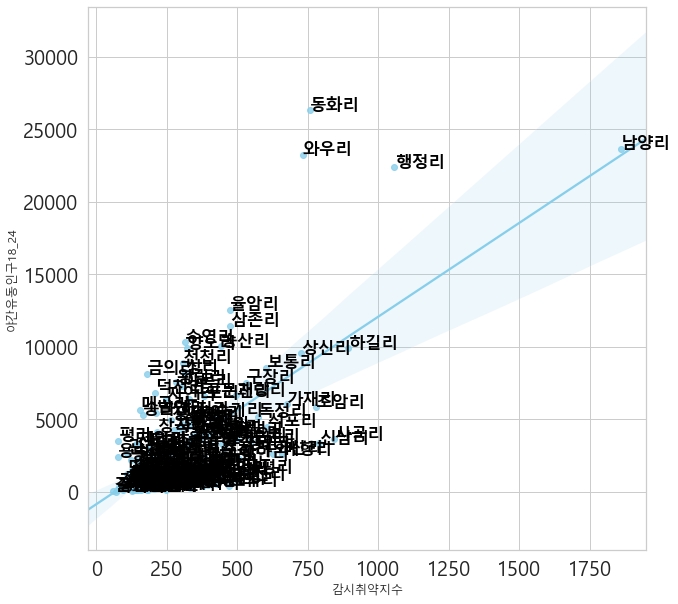

In [33]:
#읍면동별 취약지수와 상가관계
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 14})

p1 = sns.regplot(x="감시취약지수",y='야간유동인구18_24',data=cctv_li,marker="o", color="skyblue")

for line in range(1,cctv_li.shape[0]):
     p1.text(cctv_li['감시취약지수'][line]+1, cctv_li['야간유동인구18_24'][line], cctv_li['법정리'][line], horizontalalignment='left', size='large', color='black', weight='semibold')

# 인구정보들어있는 데이터 정규성 파악

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([   0.,    0.,    0., ..., 1144., 1257., 1281.])),
 (25.052303037497097, 10.441386569363566, 0.39449768378673555))

Text(0.5, 1.0, 'ProbPlot of 총인구')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 283., 285., 303.])),
 (2.905338070557437, 1.0275068416251505, 0.2467259426092642))

Text(0.5, 1.0, 'ProbPlot of 범죄취약인구(10,20,30대)')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 76., 80., 94.])),
 (1.0597246587573204, 0.4032980141744444, 0.3177143826075197))

Text(0.5, 1.0, 'ProbPlot of 초등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 32., 33., 36.])),
 (0.36889271824723335, 0.13410988702547205, 0.27362314363377904))

Text(0.5, 1.0, 'ProbPlot of 중등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([ 0.,  0.,  0., ..., 28., 38., 40.])),
 (0.31841022032226113, 0.11461651813907811, 0.26407845216316345))

Text(0.5, 1.0, 'ProbPlot of 고등여학생')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 100., 146., 201.])),
 (1.2880015681500847, 0.5037400884148487, 0.34028973166801363))

Text(0.5, 1.0, 'ProbPlot of 20대여자')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 139., 150., 156.])),
 (2.1053278836818246, 0.8261174654410227, 0.3466227301821468))

Text(0.5, 1.0, 'ProbPlot of 30대여자')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([  0.,   0.,   0., ..., 604., 618., 648.])),
 (12.025046591972117, 4.906574977194589, 0.38081067035994065))

Text(0.5, 1.0, 'ProbPlot of 총여자인구')

((array([-4.271052  , -4.06895476, -3.95891008, ...,  3.95891008,
          4.06895476,  4.271052  ]),
  array([   0.      ,    0.      ,    0.      , ..., 1872.515833,
         2333.081667, 2612.79    ])),
 (27.383147360287836, 12.861949559623898, 0.45295866870390317))

Text(0.5, 1.0, 'ProbPlot of 야간시간유동인구')

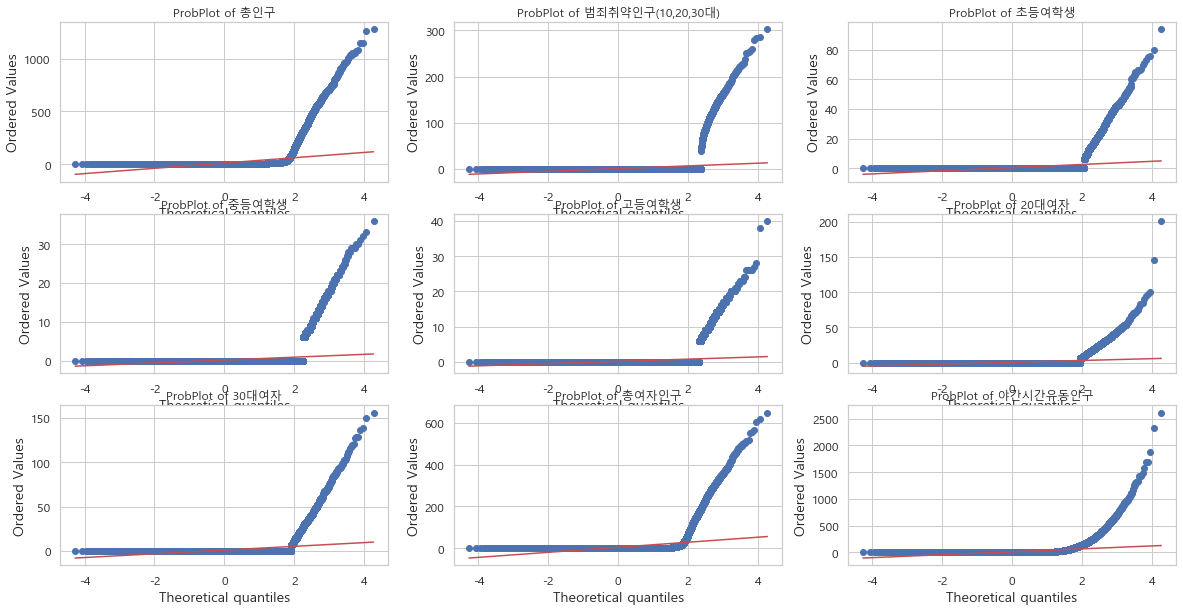

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(3,3,1)
sp.stats.probplot(cctv['총인구'], plot=plt)
plt.title("ProbPlot of 총인구")

plt.subplot(3,3,2)
sp.stats.probplot(cctv['범죄취약인구'], plot=plt)
plt.title("ProbPlot of 범죄취약인구(10,20,30대)")

plt.subplot(3,3,3)
sp.stats.probplot(cctv['age8_13'], plot=plt)
plt.title("ProbPlot of 초등여학생")

plt.subplot(3,3,4)
sp.stats.probplot(cctv['age14_16'], plot=plt)
plt.title("ProbPlot of 중등여학생")

plt.subplot(3,3,5)
sp.stats.probplot(cctv['age17_19'], plot=plt)
plt.title("ProbPlot of 고등여학생")

plt.subplot(3,3,6)
sp.stats.probplot(cctv['age20_29'], plot=plt)
plt.title("ProbPlot of 20대여자")

plt.subplot(3,3,7)
sp.stats.probplot(cctv['age30_39'], plot=plt)
plt.title("ProbPlot of 30대여자")

plt.subplot(3,3,8)
sp.stats.probplot(cctv['age_total'], plot=plt)
plt.title("ProbPlot of 총여자인구")

plt.subplot(3,3,9)
sp.stats.probplot(cctv['time_18_24'], plot=plt)
plt.title("ProbPlot of 야간시간유동인구")

# 로지스틱한번돌려봄 ㅋ

In [61]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = cctv.loc[:,'총인구':'범죄취약지수']
y = cctv['최종설치지수']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

55757
18586
55757
18586


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print(y_pred)
print(list(y_test))
 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model = smf.ols(formula = '최종설치지수 ~CCTV설치유무', data = cctv)
result = model.fit()
result.summary()

In [194]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = '최종설치지수 ~ 총인구+ CCTV갯수+ CCTV조회건수+ 범죄등급합+ cctv설치유무+ 유흥갯수+ 숙박갯수+금융갯수+ 단독주택면적+ 범죄취약인구+ age20_29+ age30_39+ age8_13+age14_16+ age17_19+ age_total+ time_24_06+ time_18_24', data = cctv2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 최종설치지수   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.81e-14
Time:                        13:54:32   Log-Likelihood:                -266.84
No. Observations:                  37   AIC:                             571.7
Df Residuals:                      18   BIC:                             602.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -115.0653    155.040     -0.742      0.468    -440.792     210.662
총인구            1.1189      0.248      4.511      0.000       0.598       1.640
CCTV갯수         0.6231      1.961      0.318      0.754      -3.497       4.743
CCTV조회건수      -5.8042     15.606     -0.372      0.714     -38.592      26.984
범죄등급합          1.8073      6.693      0.270      0.790     -12.255      15.869
cctv설치유무       2.0653      4.923      0.420      0.680      -8.277      12.408
유흥갯수         -20.6411     10.906     -1.893      0.075     -43.554       2.272
숙박갯수           9.5004      9.877      0.962      0.349     -11.251      30.251
금융갯수         135.0183     97.811      1.380      0.184     -70.476     340.513
단독주택면적         0.0060      0.003      2.018      0.059      -0.000       0.012
범죄취약인구         0.1084      0.484      0.224      0.825      -0.908       1.124
age20_29      -2.8036      1.346     -2.083      0.052      -5.631       0.024
age30_39      -0.5265      0.413     -1.275      0.218      -1.394       0.341
age8_13       -2.6110      2.074     -1.259      0.224      -6.968       1.746
age14_16       2.2781      4.423      0.515      0.613      -7.015      11.571
age17_19       0.0476      3.079      0.015      0.988      -6.421       6.516
age_total     -1.6413      0.408     -4.020      0.001      -2.499      -0.783
time_24_06     0.0467      0.092      0.509      0.617      -0.146       0.239
time_18_24     0.0402      0.023      1.717      0.103      -0.009       0.089
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                0.638
Skew:                           0.075   Prob(JB):                        0.727
Kurtosis:                       3.626   Cond. No.                     3.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y=y[y!=0]

((array([-4.04694978, -3.83424069, -3.71799122, ...,  3.71799122,
          3.83424069,  4.04694978]),
  array([ 0.5  ,  0.5  ,  0.5  , ..., 18.161, 18.161, 18.823])),
 (4.21928600118333, 5.093904738733346, 0.9245263069364738))

((array([-4.04694978, -3.83424069, -3.71799122, ...,  3.71799122,
          3.83424069,  4.04694978]),
  array([-0.69314718, -0.69314718, -0.69314718, ...,  2.89927644,
          2.89927644,  2.93507953])),
 (1.0569406839953566, 1.123939871624709, 0.9634101158247554))

((array([-4.04694978, -3.83424069, -3.71799122, ...,  3.71799122,
          3.83424069,  4.04694978]),
  array([0.70710678, 0.70710678, 0.70710678, ..., 4.26157248, 4.26157248,
         4.33854814])),
 (0.97047101949887, 2.017732287342859, 0.9595175850526756))

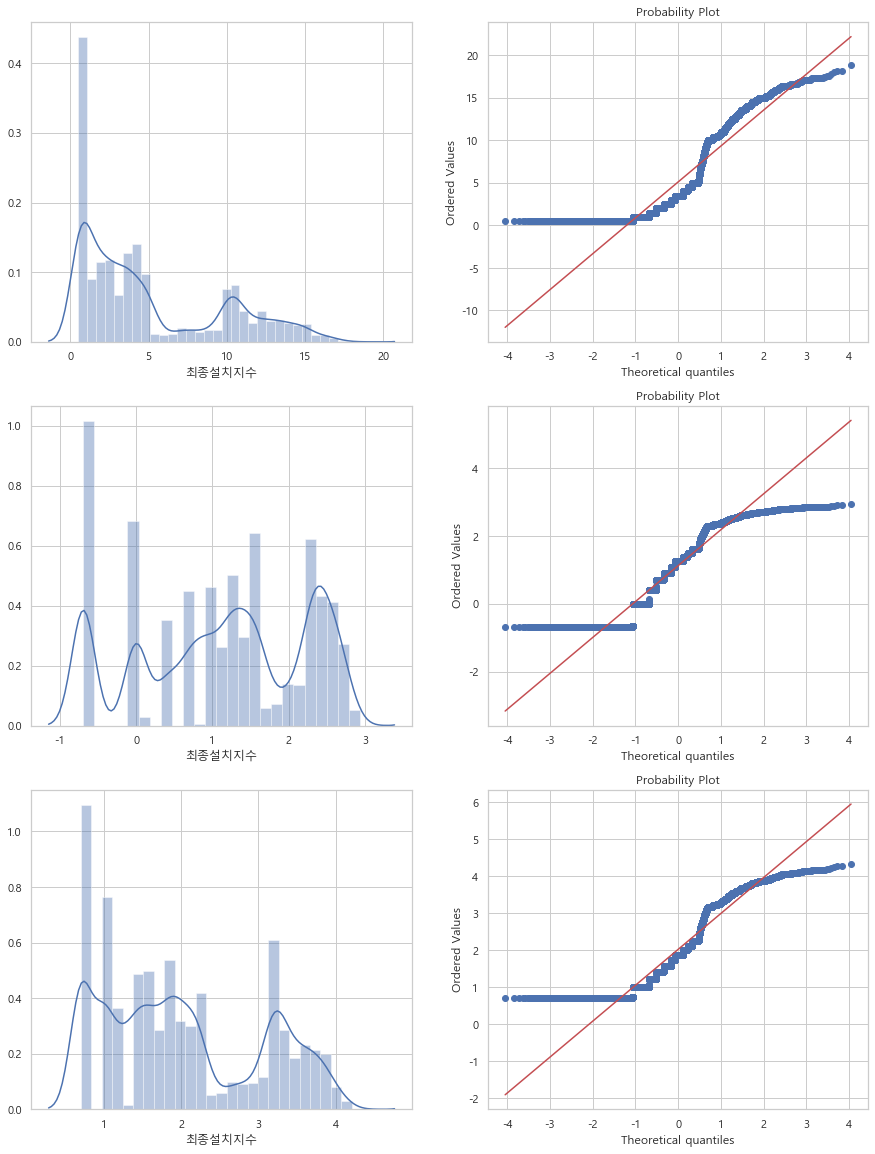

In [72]:
from scipy import stats
figure, axes = plt.subplots(ncols = 2, nrows = 3)
figure.set_size_inches(15,20)

# normal
sns.distplot(y,ax=axes[0][0])
stats.probplot(y,dist='norm',fit=True,plot=axes[0][1])

# log
sns.distplot(np.log(y),ax=axes[1][0])
stats.probplot(np.log(y),dist='norm',fit=True,plot=axes[1][1])

# sqrt
sns.distplot(np.sqrt(y),ax=axes[2][0])
stats.probplot(np.sqrt(y),dist='norm',fit=True,plot=axes[2][1])